In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
pd.options.display.max_rows = 100

In [3]:
color = sns.color_palette()

In [4]:
data = pd.read_csv('Python for DS/Final project/train.csv')

In [5]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
data.shape

(10000, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


In [8]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
square_stat = data.groupby(['Rooms'])['Square'].mean()
square_stat

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

In [10]:
data.loc[~(data['Rooms'].between(1, 5))]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646


In [11]:
rooms_id = pd.Series()

In [12]:
rooms_id = data.loc[~(data['Rooms'].between(1, 5)), 'Id']
rooms_id = pd.Series(rooms_id)
rooms_id.reset_index(drop=True, inplace=True)
rooms_id

0      5927
1     12638
2      8491
3      7917
4     14003
5      7317
6       770
7       456
8      3224
9      3159
10     9443
11    14865
Name: Id, dtype: int64

In [13]:
data.loc[data['Square'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [14]:
type(rooms_id)

pandas.core.series.Series

In [15]:
num_rooms = pd.Series([2, 5, 1, 6, 2, 1, 2, 3, 0, 1, 3, 2])
num_rooms

0     2
1     5
2     1
3     6
4     2
5     1
6     2
7     3
8     0
9     1
10    3
11    2
dtype: int64

In [16]:
for i in range(len(num_rooms)):
    data.loc[data['Id']==rooms_id[i], 'Rooms'] = num_rooms[i]

In [17]:
square_stat[2]

56.78821360752913

In [18]:
data.loc[data['Id'] == 28, 'Square'] = square_stat[2]

In [19]:
data.loc[data['Id'] == 2307, 'Square'] = square_stat[1]

In [20]:
data.loc[data['Id'] == 11602, 'Square'] = square_stat[2]

In [21]:
data.loc[(data['Square'] < 15) & (data['LifeSquare'] > 15), 'Square'] = data['LifeSquare']

In [22]:
data.loc[(data['Square'] < 15) & (data['Rooms'] == 1), 'Square'] = square_stat[1]

In [23]:
data.loc[(data['Square'] < 15) & (data['Rooms'] == 3), 'Square'] = square_stat[3]

In [24]:
data.loc[data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [25]:
data = data.loc[~(data['Rooms'] == 0), :]
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [26]:
data.loc[data['LifeSquare'].isna()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
27,7550,23,2.0,64.556209,NaN,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,173910.923723
36,11703,23,1.0,41.118766,NaN,1.0,4,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,103510.223601
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
43,175,23,2.0,58.692133,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,184501.011225
46,1821,23,2.0,49.929489,NaN,1.0,9,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,88464.425395


In [27]:
data.loc[data['Square'] < data['LifeSquare'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,165071.825722
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,182228.520030
236,3916,1,1.0,43.084413,47.071617,1.0,9,7.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,169749.173815


In [28]:
data['LifeSquare'] = data['LifeSquare'].fillna(100000)

In [29]:
LifeSquare_stat = data.loc[data['Square'] > data['LifeSquare'], :].groupby(['Rooms'])['LifeSquare'].mean()
LifeSquare_stat

Rooms
1.0     23.380193
2.0     34.104877
3.0     48.840212
4.0     62.572179
5.0     92.196876
6.0    211.231125
Name: LifeSquare, dtype: float64

In [30]:
square_stat = data.groupby(['Rooms'])['Square'].mean()
square_stat

Rooms
1.0     41.305254
2.0     56.513139
3.0     76.977042
4.0     98.377544
5.0    123.447192
6.0    212.932361
Name: Square, dtype: float64

In [31]:
LifeSquare_portion = LifeSquare_stat/square_stat
LifeSquare_portion

Rooms
1.0    0.566034
2.0    0.603486
3.0    0.634478
4.0    0.636041
5.0    0.746853
6.0    0.992010
dtype: float64

In [32]:
LifeSquare_portion[6] = LifeSquare_portion[5]

In [33]:
LifeSquare_portion

Rooms
1.0    0.566034
2.0    0.603486
3.0    0.634478
4.0    0.636041
5.0    0.746853
6.0    0.746853
dtype: float64

In [34]:
#LifeSquare_portion = pd.DataFrame(LifeSquare_portion)
#LifeSquare_portion.reset_index(drop=False, inplace=True)
#LifeSquare_portion

In [35]:
#LifeSquare_portion.rename(columns={0: 'LifeSquare_portion'})
#LifeSquare_portion

In [36]:
#data = pd.merge(data, LifeSquare_stat, on = 'Rooms', how = 'left')
#data

In [37]:
for i in range(6):
    data.loc[(data['Square'] < data['LifeSquare']) & data['Rooms'] == (i+1), 'LifeSquare'] = LifeSquare_portion[i+1] * \
    data['Square']

In [38]:
for i in range(6):
    data.loc[(data['LifeSquare'] < 10) & data['Rooms'] == (i+1) , 'LifeSquare'] = LifeSquare_portion[i+1] * data['Square']

In [39]:
data.loc[data['Id'] == 11993, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,45.459875,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664


In [40]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,5202.000000,9999.000000,9999.000000,9999.000000
mean,8383.923692,50.403140,1.888989,56.222584,34.948315,6.273927,8.527453,12.610661,3.990368e+03,0.118868,24.689269,5352.645765,8.040004,1142.904460,1.319632,4.231723,214147.612466
std,4858.988019,43.589143,0.813025,19.071617,14.475723,28.562276,5.240870,6.775139,2.005103e+05,0.119027,17.532023,4006.702533,23.832931,1021.517264,1.493617,4.806395,92872.811296
min,0.000000,0.000000,1.000000,15.988889,9.122863,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4170.500000,20.000000,1.000000,41.781737,23.537923,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153889.327888
50%,8395.000000,36.000000,2.000000,52.534282,32.421214,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192277.326489
75%,12593.000000,75.000000,2.000000,65.901823,43.093948,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249148.484733
max,16798.000000,209.000000,6.000000,275.645284,233.949309,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [41]:
data.loc[data['KitchenSquare'].between(3, 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1476,1775,101,1.0,23.583220,18.442768,3.0,3,5.0,1968,0.225825,A,B,41,6558,7,1548.0,3,2,B,108232.647619
2314,5798,59,3.0,109.698926,62.093361,3.0,16,22.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,524279.240155
3084,3732,112,1.0,20.213128,13.800281,3.0,5,9.0,1974,0.069660,B,B,31,6119,4,NaN,1,2,B,113050.229914
3794,523,101,1.0,18.509177,15.170851,3.0,5,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B,115845.861527
4118,828,90,1.0,20.924926,10.651455,3.0,7,5.0,1968,0.265089,B,B,37,5288,0,1937.0,3,2,B,128808.087357
4364,9905,41,1.0,22.691542,13.499648,3.0,7,9.0,1972,0.175055,B,B,36,10055,3,NaN,1,0,B,136682.956950
4650,10940,75,1.0,24.749737,16.531306,3.0,5,5.0,1975,0.307467,B,A,30,5048,9,325.0,2,5,B,86821.619523
5560,16680,23,3.0,67.133598,37.999923,3.0,2,16.0,2015,0.034656,B,B,0,168,0,NaN,0,0,B,132755.210048
5667,4352,104,2.0,28.517666,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,1046.0,3,23,B,197245.267664
6155,7729,90,1.0,27.298757,15.250474,3.0,1,5.0,1967,0.265089,B,B,37,5288,0,1937.0,3,2,B,126918.470566


In [42]:
#KitchenSquare_stat = data.loc[(data['KitchenSquare'].between(5, 1000)) & (data['Square'] > data['KitchenSquare']), \
#         :].groupby(['Rooms'])['KitchenSquare'].apply(lambda x: x.mode())
KitchenSquare_stat = pd.Series([8, 5, 10, 10, 10], index = [1, 2, 3, 4, 5])
KitchenSquare_stat

1     8
2     5
3    10
4    10
5    10
dtype: int64

In [43]:
for i in range(5):
    data.loc[(data['KitchenSquare'].between(0, 4)) & (data['Rooms'] == (i+1)) \
             , 'KitchenSquare'] = KitchenSquare_stat[i+1]

In [44]:
for i in range(5):
    data.loc[(data['KitchenSquare'] > data['Square'] * 0.5) & (data['Rooms'] == (i+1)) \
             , 'KitchenSquare'] = KitchenSquare_stat[i+1]

In [45]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,5202.000000,9999.000000,9999.000000,9999.000000
mean,8383.923692,50.403140,1.888989,56.222584,34.948315,7.778578,8.527453,12.610661,3.990368e+03,0.118868,24.689269,5352.645765,8.040004,1142.904460,1.319632,4.231723,214147.612466
std,4858.988019,43.589143,0.813025,19.071617,14.475723,2.418129,5.240870,6.775139,2.005103e+05,0.119027,17.532023,4006.702533,23.832931,1021.517264,1.493617,4.806395,92872.811296
min,0.000000,0.000000,1.000000,15.988889,9.122863,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4170.500000,20.000000,1.000000,41.781737,23.537923,6.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153889.327888
50%,8395.000000,36.000000,2.000000,52.534282,32.421214,8.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192277.326489
75%,12593.000000,75.000000,2.000000,65.901823,43.093948,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249148.484733
max,16798.000000,209.000000,6.000000,275.645284,233.949309,43.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [46]:
data.loc[data['KitchenSquare'] < 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,6.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887


In [47]:
data.loc[data['Id'] == 7917, 'LifeSquare'] = LifeSquare_portion[5] * data.loc[data['Id'] == 7917, 'Square']

In [48]:
data.loc[data['Id'] == 7917, 'KitchenSquare'] = KitchenSquare_stat[5]

In [49]:
data.loc[data['Id'] == 7917, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,6.0,212.932361,159.029122,10.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887


In [50]:
data['HouseFloor'].mode()


0    17.0
dtype: float64

In [51]:
HouseFloor_mode = 17

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 20 columns):
Id               9999 non-null int64
DistrictId       9999 non-null int64
Rooms            9999 non-null float64
Square           9999 non-null float64
LifeSquare       9999 non-null float64
KitchenSquare    9999 non-null float64
Floor            9999 non-null int64
HouseFloor       9999 non-null float64
HouseYear        9999 non-null int64
Ecology_1        9999 non-null float64
Ecology_2        9999 non-null object
Ecology_3        9999 non-null object
Social_1         9999 non-null int64
Social_2         9999 non-null int64
Social_3         9999 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      9999 non-null int64
Shops_1          9999 non-null int64
Shops_2          9999 non-null object
Price            9999 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.7+ MB


In [53]:
data.loc[data['HouseFloor'].between(0, 2), 'HouseFloor'] = HouseFloor_mode

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 20 columns):
Id               9999 non-null int64
DistrictId       9999 non-null int64
Rooms            9999 non-null float64
Square           9999 non-null float64
LifeSquare       9999 non-null float64
KitchenSquare    9999 non-null float64
Floor            9999 non-null int64
HouseFloor       9999 non-null float64
HouseYear        9999 non-null int64
Ecology_1        9999 non-null float64
Ecology_2        9999 non-null object
Ecology_3        9999 non-null object
Social_1         9999 non-null int64
Social_2         9999 non-null int64
Social_3         9999 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      9999 non-null int64
Shops_1          9999 non-null int64
Shops_2          9999 non-null object
Price            9999 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.7+ MB


In [55]:
#data.loc[data['Floor'] > data['HouseFloor'], 'Floor'] = data['Floor'].median()

In [56]:
data['HouseYear'].mode()

0    1977
dtype: int64

In [57]:
HouseYear_mode = 1977

In [58]:
#data.loc[data['Floor'] > data['HouseFloor'], :]

In [59]:
data.loc[data['HouseYear'] > 2019, 'HouseYear'] = HouseYear_mode

In [60]:
#plt.figure(figsize = (8, 6))
#plt.scatter(data.loc[data['HouseFloor'].between(0, 40), 'HouseFloor'], \
#            data.loc[data['HouseFloor'].between(0, 40), 'Floor'])
#plt.ylabel('Floor')
#plt.xlabel('HouseFloor')

In [61]:
data.loc[data['HouseFloor'] < data['Floor'], 'HouseFloor'] = data['Floor']

In [62]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,5202.000000,9999.000000,9999.000000,9999.000000
mean,8383.923692,50.403140,1.888989,56.222584,34.943094,7.779578,8.527453,14.124112,1984.782878,0.118868,24.689269,5352.645765,8.040004,1142.904460,1.319632,4.231723,214147.612466
std,4858.988019,43.589143,0.813025,19.071617,14.421451,2.416979,5.240870,5.809135,18.349929,0.119027,17.532023,4006.702533,23.832931,1021.517264,1.493617,4.806395,92872.811296
min,0.000000,0.000000,1.000000,15.988889,9.122863,5.000000,1.000000,3.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4170.500000,20.000000,1.000000,41.781737,23.537923,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153889.327888
50%,8395.000000,36.000000,2.000000,52.534282,32.421214,8.000000,7.000000,16.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192277.326489
75%,12593.000000,75.000000,2.000000,65.901823,43.093948,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249148.484733
max,16798.000000,209.000000,6.000000,275.645284,233.949309,43.000000,42.000000,117.000000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [63]:
data.loc[data['HouseFloor'] < data['Floor'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [64]:
district_stat = data.loc[data['Healthcare_1'].isna(), 'DistrictId'].unique()
district_stat

array([ 35, 154,  74,   1,  23,  31,  13,  27,  34,  19,  48,  11,  61,
       200, 103,  98,  94,  44,  88,  62,  79,   9,  69, 108,  96,  18,
        41,  10,   7,  70,  45,  15,  25, 127,  56,  46, 119,  47,  80,
        83,  91,  92, 187,  36,  28,  21,  93,  85,  12,   2,  67,  57,
        64,  55,  29, 151,  33,  87, 126, 164, 105,  89,   8,  58, 201,
       124, 177, 117, 149, 131, 145,  26,  42, 208, 176,  22, 173, 112,
        78, 161, 138, 146, 191, 129, 169, 128,  17, 178,  68, 150,  97,
        65, 140, 141, 167,  77, 162, 148, 184, 182, 205, 159], dtype=int64)

In [65]:
district_stat = pd.DataFrame(district_stat)
district_stat.nunique()

0    102
dtype: int64

In [66]:
data_corr = data.corr()
data_corr

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012917,-0.008317,-0.005616,-0.002012,0.012274,0.001195,-0.010869,0.003386,0.018009,-0.000909,-0.002163,-0.009394,-0.003879,0.001408,-0.008812,0.009781
DistrictId,0.012917,1.000000,0.074999,-0.029028,-0.022940,-0.013028,-0.120465,-0.252137,-0.202993,0.065252,0.246418,0.167428,0.136079,0.304335,0.306116,0.174176,0.265065
Rooms,-0.008317,0.074999,1.000000,0.766622,0.714525,0.144367,-0.007500,-0.048183,-0.042062,-0.030165,0.075419,0.070500,0.013738,0.044912,0.062086,0.052323,0.571414
Square,-0.005616,-0.029028,0.766622,1.000000,0.863347,0.396718,0.118091,0.203616,0.190828,-0.071398,-0.079486,-0.049480,0.022010,-0.039077,-0.033173,0.010331,0.581863
LifeSquare,-0.002012,-0.022940,0.714525,0.863347,1.000000,0.257438,0.076691,0.113088,0.151615,-0.053318,-0.076697,-0.054886,0.022536,-0.028590,-0.031951,0.007364,0.496359
KitchenSquare,0.012274,-0.013028,0.144367,0.396718,0.257438,1.000000,0.174223,0.328490,0.395529,-0.037954,-0.001461,0.028268,-0.037114,-0.049819,-0.034149,-0.006778,0.265677
Floor,0.001195,-0.120465,-0.007500,0.118091,0.076691,0.174223,1.000000,0.544418,0.286178,-0.016257,-0.045108,-0.016738,-0.002285,-0.138294,-0.065673,0.024141,0.128599
HouseFloor,-0.010869,-0.252137,-0.048183,0.203616,0.113088,0.328490,0.544418,1.000000,0.475794,-0.057582,-0.158449,-0.102582,-0.005614,-0.209527,-0.159122,-0.010025,0.092938
HouseYear,0.003386,-0.202993,-0.042062,0.190828,0.151615,0.395529,0.286178,0.475794,1.000000,-0.065223,-0.047163,0.014369,-0.048812,-0.202489,-0.116064,-0.000725,0.035426
Ecology_1,0.018009,0.065252,-0.030165,-0.071398,-0.053318,-0.037954,-0.016257,-0.057582,-0.065223,1.000000,0.026357,0.009161,-0.124102,-0.043547,0.030800,-0.076830,-0.058466


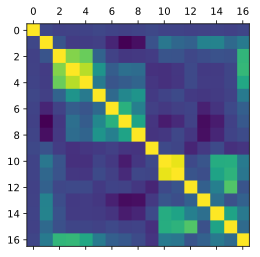

In [67]:
plt.matshow(data_corr)

In [68]:
#data_corr.to_excel('correlations.xlsx')

In [69]:
data = data.assign(SquarePrice=data['Price']/data['Square'])
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,SquarePrice
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,...,B,33,7976,5,NaN,0,11,B,184966.930730,3854.958571
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,...,B,46,10309,1,240.0,1,16,B,300009.450063,4567.491245
2,4765,53,2.0,44.947953,29.197612,5.0,8,12.0,1968,4.963726e-02,...,B,34,7759,0,229.0,1,3,B,220925.908524,4915.149522
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,...,B,23,5735,3,1084.0,0,5,B,175616.227217,3291.591637
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,...,B,35,5776,1,2078.0,2,4,B,150226.531644,3788.892642
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,...,B,35,7715,4,990.0,0,6,B,215898.447742,2685.822560
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,...,B,20,4386,14,NaN,1,5,B,296021.204377,4755.046491
7,11993,74,2.0,80.312926,45.459875,5.0,14,17.0,1977,7.577876e-02,...,B,6,1437,3,NaN,0,2,B,221244.156664,2754.776456
8,5172,1,2.0,64.511437,36.515690,5.0,9,17.0,1977,7.122317e-03,...,B,1,264,0,NaN,0,1,B,229102.795999,3551.351598
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,...,B,6,1437,3,NaN,0,2,B,95380.220993,2052.891285


In [70]:
district_stat = data.groupby(['DistrictId'])['SquarePrice'].mean()

district_stat = pd.DataFrame(district_stat)
district_stat.sort_values(by=['SquarePrice'], inplace=True, ascending=False)

district_stat.reset_index(inplace=True)

In [71]:
district_dict = dict(zip(district_stat['DistrictId'], district_stat['SquarePrice']))

In [72]:
data = data.assign(AvPrice_by_dist=1)
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,SquarePrice,AvPrice_by_dist
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,...,33,7976,5,NaN,0,11,B,184966.930730,3854.958571,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,...,46,10309,1,240.0,1,16,B,300009.450063,4567.491245,1
2,4765,53,2.0,44.947953,29.197612,5.0,8,12.0,1968,4.963726e-02,...,34,7759,0,229.0,1,3,B,220925.908524,4915.149522,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,...,23,5735,3,1084.0,0,5,B,175616.227217,3291.591637,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,...,35,5776,1,2078.0,2,4,B,150226.531644,3788.892642,1
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,...,35,7715,4,990.0,0,6,B,215898.447742,2685.822560,1
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,...,20,4386,14,NaN,1,5,B,296021.204377,4755.046491,1
7,11993,74,2.0,80.312926,45.459875,5.0,14,17.0,1977,7.577876e-02,...,6,1437,3,NaN,0,2,B,221244.156664,2754.776456,1
8,5172,1,2.0,64.511437,36.515690,5.0,9,17.0,1977,7.122317e-03,...,1,264,0,NaN,0,1,B,229102.795999,3551.351598,1
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,...,6,1437,3,NaN,0,2,B,95380.220993,2052.891285,1


In [73]:
for i in district_stat['DistrictId']:
    data.loc[data['DistrictId']==i, 'AvPrice_by_dist'] = district_dict[i]

In [74]:
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,SquarePrice,AvPrice_by_dist
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,...,33,7976,5,NaN,0,11,B,184966.930730,3854.958571,4384.628620
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,...,46,10309,1,240.0,1,16,B,300009.450063,4567.491245,4293.480295
2,4765,53,2.0,44.947953,29.197612,5.0,8,12.0,1968,4.963726e-02,...,34,7759,0,229.0,1,3,B,220925.908524,4915.149522,4835.401165
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,...,23,5735,3,1084.0,0,5,B,175616.227217,3291.591637,3021.675025
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,...,35,5776,1,2078.0,2,4,B,150226.531644,3788.892642,3938.329635
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,...,35,7715,4,990.0,0,6,B,215898.447742,2685.822560,4746.494431
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,...,20,4386,14,NaN,1,5,B,296021.204377,4755.046491,5457.091839
7,11993,74,2.0,80.312926,45.459875,5.0,14,17.0,1977,7.577876e-02,...,6,1437,3,NaN,0,2,B,221244.156664,2754.776456,3355.343060
8,5172,1,2.0,64.511437,36.515690,5.0,9,17.0,1977,7.122317e-03,...,1,264,0,NaN,0,1,B,229102.795999,3551.351598,3213.784932
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,...,6,1437,3,NaN,0,2,B,95380.220993,2052.891285,2284.108677


In [75]:
#data.to_excel('test_2.xlsx')

In [76]:
data_corr = data.corr()
data_corr

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,SquarePrice,AvPrice_by_dist
Id,1.000000,0.012917,-0.008317,-0.005616,-0.002012,0.012274,0.001195,-0.010869,0.003386,0.018009,-0.000909,-0.002163,-0.009394,-0.003879,0.001408,-0.008812,0.009781,0.012254,0.010328
DistrictId,0.012917,1.000000,0.074999,-0.029028,-0.022940,-0.013028,-0.120465,-0.252137,-0.202993,0.065252,0.246418,0.167428,0.136079,0.304335,0.306116,0.174176,0.265065,0.386189,0.512596
Rooms,-0.008317,0.074999,1.000000,0.766622,0.714525,0.144367,-0.007500,-0.048183,-0.042062,-0.030165,0.075419,0.070500,0.013738,0.044912,0.062086,0.052323,0.571414,-0.035460,0.120289
Square,-0.005616,-0.029028,0.766622,1.000000,0.863347,0.396718,0.118091,0.203616,0.190828,-0.071398,-0.079486,-0.049480,0.022010,-0.039077,-0.033173,0.010331,0.581863,-0.197451,-0.054668
LifeSquare,-0.002012,-0.022940,0.714525,0.863347,1.000000,0.257438,0.076691,0.113088,0.151615,-0.053318,-0.076697,-0.054886,0.022536,-0.028590,-0.031951,0.007364,0.496359,-0.178410,-0.041155
KitchenSquare,0.012274,-0.013028,0.144367,0.396718,0.257438,1.000000,0.174223,0.328490,0.395529,-0.037954,-0.001461,0.028268,-0.037114,-0.049819,-0.034149,-0.006778,0.265677,-0.042506,-0.037481
Floor,0.001195,-0.120465,-0.007500,0.118091,0.076691,0.174223,1.000000,0.544418,0.286178,-0.016257,-0.045108,-0.016738,-0.002285,-0.138294,-0.065673,0.024141,0.128599,0.017284,-0.076700
HouseFloor,-0.010869,-0.252137,-0.048183,0.203616,0.113088,0.328490,0.544418,1.000000,0.475794,-0.057582,-0.158449,-0.102582,-0.005614,-0.209527,-0.159122,-0.010025,0.092938,-0.116103,-0.234848
HouseYear,0.003386,-0.202993,-0.042062,0.190828,0.151615,0.395529,0.286178,0.475794,1.000000,-0.065223,-0.047163,0.014369,-0.048812,-0.202489,-0.116064,-0.000725,0.035426,-0.165633,-0.237132
Ecology_1,0.018009,0.065252,-0.030165,-0.071398,-0.053318,-0.037954,-0.016257,-0.057582,-0.065223,1.000000,0.026357,0.009161,-0.124102,-0.043547,0.030800,-0.076830,-0.058466,-0.005492,0.017669


In [77]:
data['Healthcare_1'] = data['Healthcare_1'].fillna(-1000)

In [78]:
data = pd.get_dummies(data, columns =['Ecology_2', 'Ecology_3', 'Shops_2'])

In [79]:
#data.to_excel('test_3.xlsx')

# МОДЕЛИ

### Линейная регрессия

In [80]:
from sklearn.metrics import r2_score as r2

In [81]:
def create_model(X, y, fts, model):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train.loc[:, fts], y_train)
    y_train_pred = model.predict(X_train.loc[:, fts])
    y_valid_pred = model.predict(X_valid.loc[:, fts])
    return [r2(y_train, y_train_pred), r2(y_valid, y_valid_pred)]

In [82]:
data_1 = data.loc[data['Square'] < 150, :]

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
#X = data.iloc[:, :-1]
#X

In [86]:
y = data['Price']
#y = data['Price']/data['Square']

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler_std = StandardScaler()

In [89]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'SquarePrice', 'AvPrice_by_dist', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [90]:
#fts = ['Rooms', 'Square', 'LifeSquare' - нет, 'KitchenSquare', \
#       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', \
#       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'AvPrice_by_dist', 'Ecology_2_A', 'Ecology_2_B', \
#       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']
fts = ['Rooms', 'Square', 'Social_1', 'Healthcare_1', 'AvPrice_by_dist']

fts_sc = ['Rooms', 'Square', 'AvPrice_by_dist']

fts_nsc = ['Ecology_1', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', \
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

#fts_1 = ['Rooms', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'Social_1', 'AvPrice_by_dist']
#fts = ['Social_1']

In [91]:
X = data[fts]

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
#X_train_scaled = scaler_std.fit_transform(X_train[fts_sc])
#X_train_scaled

In [94]:
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[fts_sc].columns)
#X_train_scaled = pd.merge(X_train_scaled, X_train[fts_nsc], how='outer')
#X_train_scaled

In [95]:
#X_valid_scaled = scaler_std.fit_transform(X_valid)

In [96]:
#X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)

In [97]:
#X_train_scaled_1 = X_train_scaled[fts_1]

In [98]:
#X_valid_scaled_1 = X_valid_scaled[fts_1]

In [99]:
lr = LinearRegression()

In [100]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
y_train_pred = lr.predict(X_train)

In [102]:
r2(y_train, y_train_pred)

0.6749684853959121

In [103]:
y_valid_pred = lr.predict(X_valid)

In [104]:
r2(y_valid, y_valid_pred)

0.6413467269321691

In [105]:
create_model(X, y, fts, lr)

[0.6749684853959123, 0.6413467269321694]

### Lasso

In [106]:
from sklearn.linear_model import Lasso

In [107]:
model = Lasso(alpha=0.1)

In [108]:
create_model(X, y, fts, model)

[0.6749684853915989, 0.6413467347888566]

In [109]:
#plt.figure(figsize = (8, 6))
#plt.scatter(data['Square'], data['Price'], c=data['DistrictId'])
#plt.ylabel('Price')
#plt.xlabel('Square')

### Ridge

In [110]:
from sklearn.linear_model import Ridge

In [111]:
model = Ridge(alpha=0.05)

In [112]:
create_model(X, y, fts, model)

[0.6749684853938124, 0.6413467300090068]

### RandomForest

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
x_year = 1957
data['OldHouse'] = (data['HouseYear'] <= x_year).astype(int)
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,SquarePrice,AvPrice_by_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,OldHouse
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,184966.930730,3854.958571,4384.628620,0,1,0,1,0,1,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,300009.450063,4567.491245,4293.480295,0,1,0,1,0,1,0
2,4765,53,2.0,44.947953,29.197612,5.0,8,12.0,1968,0.049637,...,220925.908524,4915.149522,4835.401165,0,1,0,1,0,1,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,175616.227217,3291.591637,3021.675025,0,1,0,1,0,1,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,150226.531644,3788.892642,3938.329635,0,1,0,1,0,1,0


In [116]:
x_year2 = 1998
data['NewHouse'] = (data['HouseYear'] >= x_year2).astype(int)
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,SquarePrice,AvPrice_by_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,OldHouse,NewHouse
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,3854.958571,4384.628620,0,1,0,1,0,1,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,4567.491245,4293.480295,0,1,0,1,0,1,0,0
2,4765,53,2.0,44.947953,29.197612,5.0,8,12.0,1968,0.049637,...,4915.149522,4835.401165,0,1,0,1,0,1,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3291.591637,3021.675025,0,1,0,1,0,1,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,3788.892642,3938.329635,0,1,0,1,0,1,0,0


In [117]:
fts = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', \
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', \
       'Helthcare_2', 'Shops_1', 'AvPrice_by_dist', 'Ecology_2_A', 'Ecology_2_B', \
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'OldHouse', 'NewHouse']

In [118]:
params = [{'n_estimators': [300], 
               'max_features': [10],
               'max_depth': [12]}]

In [119]:
rf_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=100, min_samples_leaf=2, n_jobs=-1),
                     param_grid = params,
                     scoring='r2',
                     cv=5)

In [120]:
data_1 = data.loc[data['LifeSquare'] < 100, :]
data_1.shape

(9970, 27)

In [121]:
#X_rf = data_1[fts]

In [122]:
X_rf = data_1.loc[:, fts]

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(X_rf, data_1['Price'], test_size=0.3, random_state=42)

In [124]:
rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [300], 'max_features': [10], 'max_depth': [12]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [125]:
rf_reg.best_params_

{'max_depth': 12, 'max_features': 10, 'n_estimators': 300}

In [126]:
y_valid_pred = rf_reg.predict(X_valid)

In [127]:
y_pred = rf_reg.predict(X_train)

In [128]:
r2(y_train, y_pred)

0.9042576694835269

In [129]:
r2(y_valid, y_valid_pred)

0.7666166958748242

### Тестовые данные

In [130]:
test = pd.read_csv('Python for DS/Final project/test.csv')

In [131]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [132]:
test.shape

(5000, 19)

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.6+ KB


In [134]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [135]:
square_stat

Rooms
1.0     41.305254
2.0     56.513139
3.0     76.977042
4.0     98.377544
5.0    123.447192
6.0    212.932361
Name: Square, dtype: float64

In [136]:
test.loc[test['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [137]:
test.loc[test['Id'] == 10793, 'Rooms'] = 5

In [138]:
test.loc[test['Id'] == 1435, 'Rooms'] = 2

In [139]:
test.loc[test['Rooms'] == 0, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [140]:
test.loc[test['Id'] == 3343, 'Rooms'] = 5
test.loc[test['Id'] == 10729, 'Rooms'] = 3

In [141]:
test.loc[test['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3697,15435,21,1.0,13.305531,9.495367,0.0,6,5.0,1965,0.194489,B,B,47,8004,3,125.0,3,5,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [142]:
test.loc[(test['Square'] < 15) & (test['LifeSquare'] > 15), 'Square'] = test['LifeSquare']

In [143]:
test.loc[(test['Square'] < 15) & (test['Rooms'] == 1), 'Square'] = square_stat[1]

In [144]:
test.loc[(test['Square'] < 15) & (test['Rooms'] == 2), 'Square'] = square_stat[2]

In [145]:
test['LifeSquare'] = test['LifeSquare'].fillna(100000)

In [146]:
LifeSquare_portion

Rooms
1.0    0.566034
2.0    0.603486
3.0    0.634478
4.0    0.636041
5.0    0.746853
6.0    0.746853
dtype: float64

In [147]:
for i in range(6):
    test.loc[(test['Square'] < test['LifeSquare']) & test['Rooms'] == (i+1), 'LifeSquare'] = LifeSquare_portion[i+1] * \
    test['Square']

In [148]:
for i in range(6):
    test.loc[(test['LifeSquare'] < 10) & test['Rooms'] == (i+1) , 'LifeSquare'] = LifeSquare_portion[i+1] * test['Square']

In [149]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908400,56.520294,35.105844,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.810519,18.973090,13.929013,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,1.000000,15.948246,10.273109,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.912403,23.786028,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.924953,32.780351,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,43.386424,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,136.921090,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [150]:
for i in range(5):
    test.loc[(test['KitchenSquare'].between(0, 4)) & (test['Rooms'] == (i+1)) \
             , 'KitchenSquare'] = KitchenSquare_stat[i+1]

In [151]:
for i in range(5):
    test.loc[(test['KitchenSquare'] > test['Square'] * 0.5) & (test['Rooms'] == (i+1)) \
             , 'KitchenSquare'] = KitchenSquare_stat[i+1]

In [152]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908400,56.520294,35.105844,7.737400,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.810519,18.973090,13.929013,2.438859,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,1.000000,15.948246,10.273109,5.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.912403,23.786028,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.924953,32.780351,8.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,43.386424,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,136.921090,42.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [153]:
test.loc[test['HouseFloor'].between(0, 2), 'HouseFloor'] = HouseFloor_mode

In [154]:
test.loc[test['HouseYear'] > 2019, 'HouseYear'] = HouseYear_mode

In [155]:
test.loc[test['HouseFloor'] < test['Floor'], 'HouseFloor'] = test['Floor']

In [156]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908400,56.520294,35.105844,7.737400,8.632000,14.05620,1984.315200,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.810519,18.973090,13.929013,2.438859,5.483228,5.95971,18.514092,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,1.000000,15.948246,10.273109,5.000000,1.000000,3.00000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.912403,23.786028,6.000000,4.000000,9.00000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.924953,32.780351,8.000000,7.000000,15.00000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,43.386424,9.000000,12.000000,17.00000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,136.921090,42.000000,78.000000,99.00000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [157]:
test = test.assign(AvPrice_by_dist=1)

In [158]:
for i in district_stat['DistrictId']:
    test.loc[test['DistrictId']==i, 'AvPrice_by_dist'] = district_dict[i]

In [159]:
test.loc[test['AvPrice_by_dist'] == 1, 'AvPrice_by_dist'] = data['SquarePrice'].mean()

In [160]:
test = pd.get_dummies(test, columns =['Ecology_2', 'Ecology_3', 'Shops_2'])

In [161]:
test['OldHouse'] = (test['HouseYear'] <= x_year).astype(int)
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,AvPrice_by_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,OldHouse
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,0,3021.675025,0,1,0,1,0,1,0
1,15856,74,2.0,69.263183,39.205341,5.0,6,17.0,1977,0.075779,...,0,2,3355.343060,0,1,0,1,0,1,0
2,5480,190,1.0,15.948246,15.948246,8.0,2,5.0,1909,0.000000,...,5,5,7919.443196,0,1,0,1,0,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3,3,4116.345095,0,1,0,1,0,1,0
4,14275,27,1.0,47.527111,43.387569,8.0,17,17.0,2017,0.072158,...,0,0,2764.605850,0,1,0,1,1,0,0


In [162]:
test['NewHouse'] = (test['HouseYear'] >= x_year2).astype(int)
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,AvPrice_by_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,OldHouse,NewHouse
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,3021.675025,0,1,0,1,0,1,0,0
1,15856,74,2.0,69.263183,39.205341,5.0,6,17.0,1977,0.075779,...,2,3355.343060,0,1,0,1,0,1,0,0
2,5480,190,1.0,15.948246,15.948246,8.0,2,5.0,1909,0.000000,...,5,7919.443196,0,1,0,1,0,1,1,0
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3,4116.345095,0,1,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,8.0,17,17.0,2017,0.072158,...,0,2764.605850,0,1,0,1,1,0,0,1


In [170]:
pred_test = rf_reg.predict(test.loc[:, fts])

In [171]:
test['Price'] = pred_test

In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
Id                 5000 non-null int64
DistrictId         5000 non-null int64
Rooms              5000 non-null float64
Square             5000 non-null float64
LifeSquare         5000 non-null float64
KitchenSquare      5000 non-null float64
Floor              5000 non-null int64
HouseFloor         5000 non-null float64
HouseYear          5000 non-null int64
Ecology_1          5000 non-null float64
Social_1           5000 non-null int64
Social_2           5000 non-null int64
Social_3           5000 non-null int64
Healthcare_1       2623 non-null float64
Helthcare_2        5000 non-null int64
Shops_1            5000 non-null int64
AvPrice_by_dist    5000 non-null float64
Ecology_2_A        5000 non-null uint8
Ecology_2_B        5000 non-null uint8
Ecology_3_A        5000 non-null uint8
Ecology_3_B        5000 non-null uint8
Shops_2_A          5000 non-null uint8
Shops_2_B          

In [173]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,AvPrice_by_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,OldHouse,NewHouse,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,3021.675025,0,1,0,1,0,1,0,0,157877.192448
1,15856,74,2.0,69.263183,39.205341,5.0,6,17.0,1977,0.075779,...,3355.343060,0,1,0,1,0,1,0,0,224573.424132
2,5480,190,1.0,15.948246,15.948246,8.0,2,5.0,1909,0.000000,...,7919.443196,0,1,0,1,0,1,1,0,242967.775792
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4116.345095,0,1,0,1,0,1,0,1,309086.905138
4,14275,27,1.0,47.527111,43.387569,8.0,17,17.0,2017,0.072158,...,2764.605850,0,1,0,1,1,0,0,1,143604.899268


In [176]:
test.loc[:, ['Id', 'Price']].to_csv('RIskhakov_predictions.csv', index=None)